# Forecasting Stock Prices
**Data Analytics and Big Data Capstone Project 2018c-5 - Data Science with Python**

“`The stock market is designed to transfer money from the active to the patient`.” ― **Warren Buffett**


## Problem Statement

Research associated with the stock market focuses on offering the best tools to the investor to predict the behavior of their product portfolio in search of the best returns; but in a smaller number it addresses the dimensionality and expectations of the new investor.

The common perception of the new investor is that it is highly risky to place their savings in these investment models or that they are beyond their economic capacity.

Variations are instantaneous, but the returns from this type of investment do not occur in the short term. It is important to recognize the pattern of behavior in the medium or long term and to have 'nerves of steel' at the first signs of loss of value of their stock.

Understanding these variations and identifying similar patterns in the past are important, for an investor who wants to be properly advised. Understanding variations is part of informed decision making when investing in the stock market.

To solve this problem, the analysis of 'Time Series' is a tool that makes it easier to forecast the trend or even to forecast the future; this will provide the right investment tool in taking their decisions.

That is why we will experiment with predicting stock prices for a technology-based company using Machine Learning and Deep Learning Techniques. With which we will structure a set of prediction models to help the new investor in taking decisions about the acquisition or sale of its stocks.

The main objective is to show how to implement these algorithms, and to provide a final demonstration with one of the models; the one that provides the best final accuracy metrics and least possible error.

To maximize results and if you have little experience in time series, I suggest to start with the following articles:

- [A comprehensive beginner’s guide to create a Time Series Forecast](https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/?utm_source=blog&utm_medium=stockmarketpredictionarticle)
- [A Complete Tutorial on Time Series Modeling](https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/?utm_source=blog&utm_medium=stockmarketpredictionarticle)


### Clarify the project goal/scope.

- The `profit or loss calculation is usually determined by the 'Close Price'` of a stock for the day, hence we will **consider the closing price as the target variable**.

- Other data sets offer additional information such as: The attributes 'Dividend', 'Split' and 'Adjusted'. These attributes can then be used for a new research approach using the '**Granger Causality Test**' which is used to find out if one series can predict another series. This research will focus on the values provided by [MacroTrends](https://www.macrotrends.net/stocks/charts/INTC/intel/stock-price-history)

### Set down Evaluation Criteria
** pending **

El historico de datos considerados para esta investigacion preliminar comprenden desde Enero 01 del 2016 hasta la Enero 01 del 2021

### Set down preliminary research hypothesis
** pending **

utilizar registros hitoricos mayores a 10 puede agregar ruido al proceso de prediccion.


## Table of Contents
 1. Setup Work Environment
 2. Exploratory Data Analysis (EDA)
 3. Time Series Decomposition
 
 
 
 3. Moving Average [Here](https://towardsdatascience.com/predict-electricity-consumption-using-time-series-analysis-4650284e40aa)
 4. Finding the best model's parameters
 5. Predictions

3. Linear Regression
4. k-Nearest Neighbors
5. Auto ARIMA
6. Prophet
7. Long Short Term Memory (LSTM)

###  1. Setup Work Environment

In [1]:
# Load libraries
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns; sns.set()

from matplotlib.pyplot import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# plot within notebook
%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
## load parameters

# set start and end date range
start_date = dt.datetime(2018, 1, 31)
end_date = dt.datetime(2020, 5, 30)

# set figure size
rcParams['figure.figsize'] = 15, 8

In [3]:
# Load dataset
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

# load data
df = pd.read_csv('.\\data\\eod.data-intc.csv')

# Change all column headings to be lower case, and remove spacing
df.columns = [str(x).lower().replace('_', '') for x in df.columns]

### 2. Exploratory Data Analysis (EDA)

Workspace details [here](https://github.com/erojaso/Forecasting-Stock-Prices/blob/master/01_workspace_stock_price_forecast_eda.ipynb)

The dataset has daily operations at the stock market close, for a total of 10090 observations and 6 attributes.

You should consider that on **Saturdays**, **Sundays** and **Holidays** there are no stock market operations and therefore there are no data for these days.

There are multiple variables in the dataset [Reference](https://www.investopedia.com/):

- Columns '**Open**' and '**Close**' represent the starting and final price at which the stock is traded on a particular day.
- Columns '**High**' and '**Low**' represent the maximum and minimum price of the share for the day.
- Column '**Volume**' reprente number of shares bought or sold in the day.

#### 2.1 General view

In [4]:
print('\n Shape of the data:\n')
print(df.shape)

print('\n Data\'s Info:\n')
print(df.info())

print('\n First data rows:')
df.head(5)


 Shape of the data:

(10090, 6)

 Data's Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10090 entries, 0 to 10089
Data columns (total 6 columns):
date      10090 non-null object
open      10090 non-null float64
high      10090 non-null float64
low       10090 non-null float64
close     10090 non-null float64
volume    10090 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 473.1+ KB
None

 First data rows:


,date,open,high,low,close,volume
0,3/17/1980,0.3255,0.3307,0.3255,0.3255,10924800
1,3/18/1980,0.3255,0.3281,0.3229,0.3229,17068800
2,3/19/1980,0.3307,0.3359,0.3307,0.3307,18508800
3,3/20/1980,0.3307,0.3346,0.3294,0.3294,11174400
4,3/21/1980,0.3229,0.3229,0.3177,0.3177,12172800


In [5]:
# setting the index as date
df['date'] = pd.to_datetime(df.date, format='%m/%d/%Y')
df.index = df['date']
df.drop(['date'], axis=1, inplace=True)
df.sort_index(ascending=True, axis=0, inplace=True)

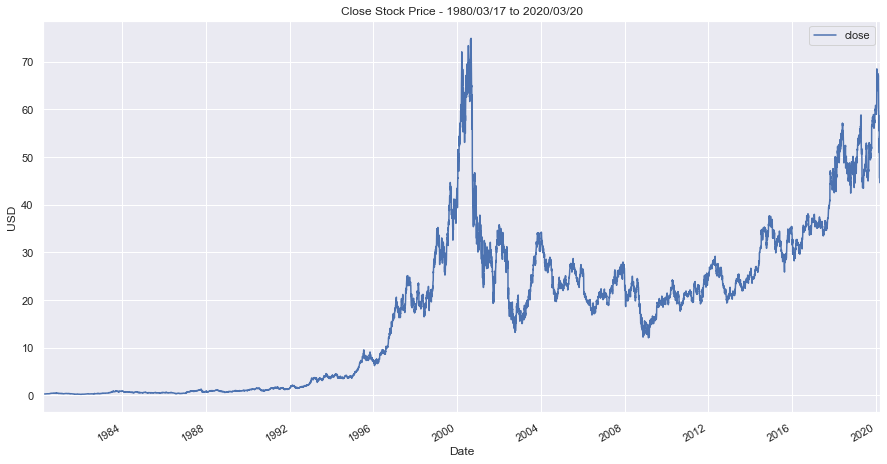

In [6]:
# plot close over time
rcParams['figure.figsize'] = 15, 8
title = 'Close Stock Price - ' + df.index[0].strftime("%Y/%m/%d") + ' to ' + df.index[len(df)-1].strftime("%Y/%m/%d")
ax = df.plot(y='close', style='b-', grid=True, title=title)
ax.set_xlabel("Date")
ax.set_ylabel("USD")

plt.savefig('.\\images\\Close_Stock_Price_Full.jpg')

In [7]:
df.describe()

,open,high,low,close,volume
count,10090.000000,10090.000000,10090.000000,10090.000000,1.009000e+04
mean,17.744796,17.988726,17.501696,17.743389,5.175399e+07
std,16.084734,16.313632,15.864770,16.085440,3.555889e+07
min,0.218800,0.218800,0.216100,0.216100,0.000000e+00
25%,1.130200,1.149350,1.117200,1.132800,2.760502e+07
50%,19.260000,19.500000,19.029950,19.250000,4.622693e+07
75%,27.306750,27.617500,26.909750,27.270000,6.631072e+07
max,75.630000,75.810000,73.630000,74.880000,5.677088e+08


The descriptive data view shows a relatively similar 'mean' and 'standard deviation' for the values 'open', ' high', 'low' and 'close'.

For the purposes of this preliminary investigation, the values for 'volume' have a bias that we will deal with right away, meanwhile we will remove this attribute from the data set.

The data set includes observations from 1980 until the present. Values older than 3 years will not be considered in this preliminary investigation.

Such a detailed study will require time that is not contemplated within the scope of this investigation.

In [8]:
# remove volume attribute
df.drop('volume', axis=1, inplace=True)
df.drop('open', axis=1, inplace=True)
df.drop('high', axis=1, inplace=True)
df.drop('low', axis=1, inplace=True)

In [9]:
# get data range by date
df_adj = df.loc[start_date:end_date, ]

In [10]:
print('\n Shape of the data:\n')
print(df_adj.shape)

print('\n Data\'s Info:\n')
print(df_adj.info())

print('\n First data rows:')
df_adj.head(5)


 Shape of the data:

(538, 1)

 Data's Info:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 538 entries, 2018-01-31 to 2020-03-20
Data columns (total 1 columns):
close    538 non-null float64
dtypes: float64(1)
memory usage: 8.4 KB
None

 First data rows:


,close
date,
2018-01-31,48.14
2018-02-01,47.65
2018-02-02,46.15
2018-02-05,44.52
2018-02-06,44.91


In [11]:
df_adj.describe()

,close
count,538.000000
mean,51.392565
std,5.197871
min,42.420000
25%,47.382500
50%,50.730000
75%,54.355000
max,68.470000


The adjustment of the proposed data returns 538 observacions with an 'average' of 51.39 and 'standard deviation' of 5.20. Also the minimum and maximum value changed have been setted for the dependent variable 'Close Price' minimum (42.42) and maximum (68.47).

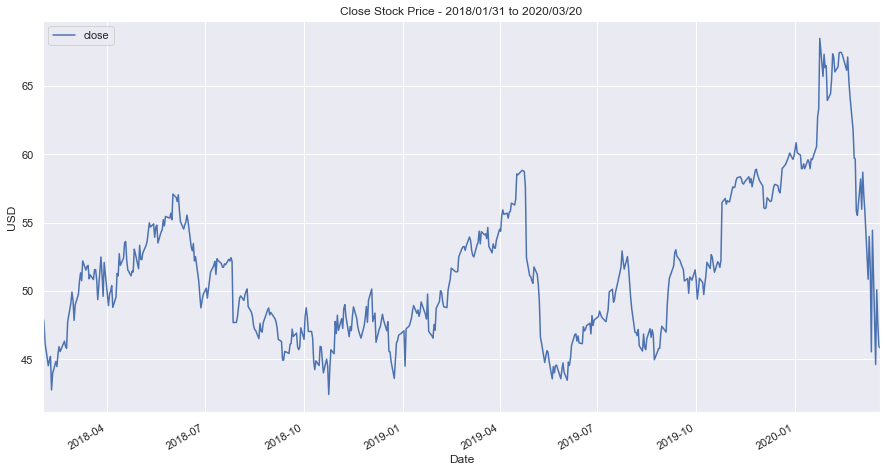

In [12]:
# plot close over time
rcParams['figure.figsize'] = 15, 8
title = 'Close Stock Price - ' + df_adj.index[0].strftime("%Y/%m/%d") + ' to ' + df_adj.index[len(df_adj)-1].strftime("%Y/%m/%d")
ax = df_adj.plot(y='close', style='b-', grid=True, title=title)
ax.set_xlabel("Date")
ax.set_ylabel("USD")

plt.savefig('.\\images\\Close_Stock_Price_Adjusted_lv1.jpg')

Therefore we need to ensure that our 'is not stationary' series. Under this scenary, we need to have a stationary series to do time series forecasting. In the next stage, we will try to convert this into a stationary series.

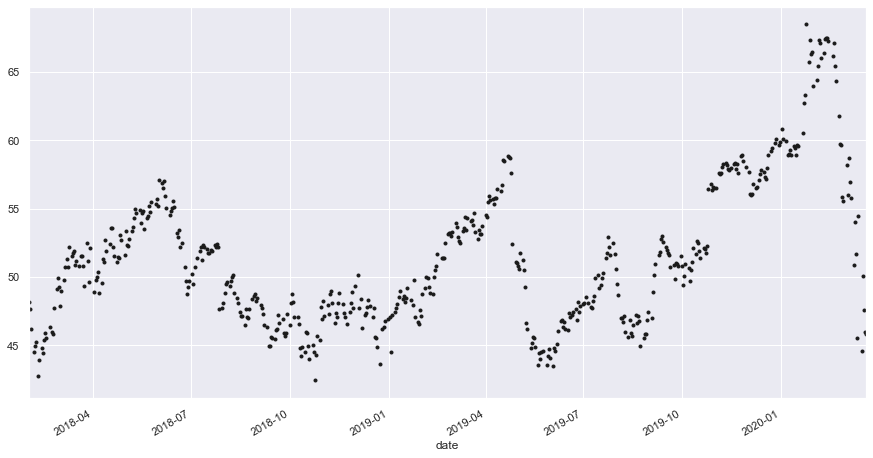

<Figure size 1080x576 with 0 Axes>

In [18]:
# plot the scatterplot:
rcParams['figure.figsize'] = 15, 8
df_adj.close.plot(style='k.')
plt.show()

plt.savefig('.\\images\\Close_Stock_Price_Adjusted_ScatterPlot_lv1.jpg')

We can also visualize the data in our series through a distribution too.

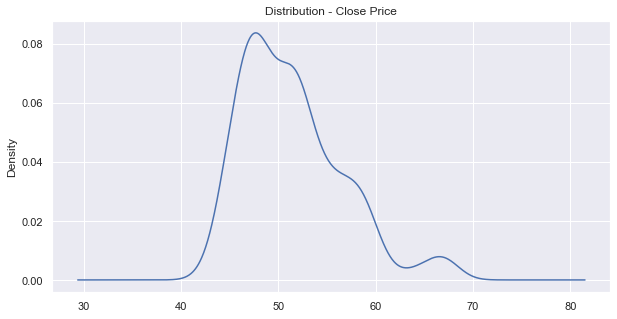

In [37]:
# Distribution of the dataset
rcParams['figure.figsize'] = 10, 5
df_adj.close.plot(kind='kde', title='Distribution - Close Price')

plt.savefig('.\\images\\Close_Stock_Price_Adjusted_Distribution_lv1.jpg')

We can observe a distribution close to a normal distribution (bell curve) with a slight bias to its right for Close values. This will possibly require us to adjust the values during data cleaning.

In order to perform a time series analysis, we may need to separate seasonality and trend from our series. The resultant series will become stationary through this process.

#### 2.2 Grouped data review

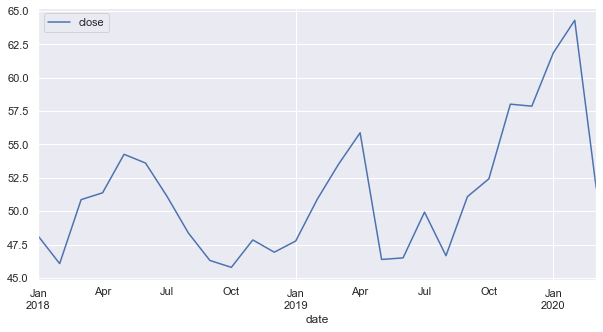

In [36]:
# year-by-year behavior per month
rcParams['figure.figsize'] = 10, 5
df_adj.resample('M').mean().plot()

plt.savefig('.\\images\\Close_Stock_Price_Adjusted_YxYxMonth_lv1.jpg')

In the previous image we can observe the monthly average behavior year by year for the selected data set. No special behavior is evident, except for the slight coincidence between the month of April-2018 and april-2019 that does not seem to imply something constant.

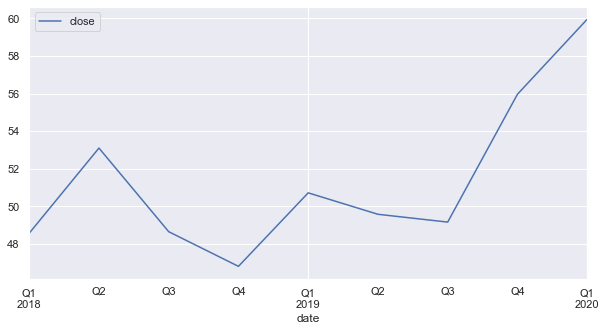

In [35]:
# year-on-year behavior by quarterly
rcParams['figure.figsize'] = 10, 5
df_adj.resample('Q').mean().plot()

plt.savefig('.\\images\\Close_Stock_Price_Adjusted_YxYxQuarte_lv1.jpg')

Similarly, there are no relevant year-to-year behaviors per quarter for the selected data set. Even, the atypical behavior shown from the fourth quarter of 2019 does not show similarity with previous years.

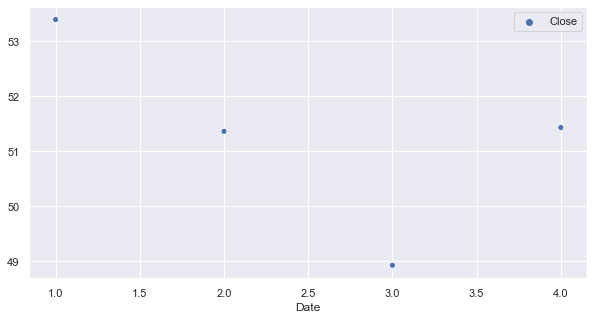

In [34]:
# cumulative average behavior per quarter
# 1, 2, 3, 4 {1st Quarter, 2dn Quarter, 3rd Quarter, 4th Quarter}
rcParams['figure.figsize'] = 10, 5
a = new_data.groupby(new_data['Date'].dt.quarter).mean()
ax = sns.scatterplot(data=a)

plt.savefig('.\\images\\Close_Stock_Price_Adjusted_CumulativeQuarte_lv1.jpg')

The accumulated behavior per quarter for the selected data set does not present a relevant similarity with the 'year-on-year behavior by quarterly'. Up to this point, the data does not provide a foothold for making preliminary hypotheses about the expected results.

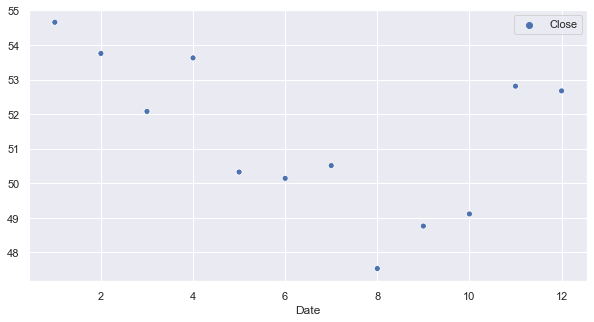

In [38]:
# monthly accumulated average behavior
rcParams['figure.figsize'] = 10, 5
a = new_data.groupby(new_data['Date'].dt.month).mean()
ax = sns.scatterplot(data=a)

plt.savefig('.\\images\\Close_Stock_Price_Adjusted_CumulativeMonth_lv1.jpg')

The monthly accumulated, shows that starting at the end of the year followed by the initial months, they provide the greatest returns to investors, with a downward trend between the third and tenth month. The atypical of the fourth month is circumscribed to the selected data set. 

In [ ]:
# average accumulated day by day
rcParams['figure.figsize'] = 10, 5
a = new_data.groupby(new_data['Date'].dt.day).mean()
ax = sns.scatterplot(data=a)

plt.savefig('.\\images\\Close_Stock_Price_Adjusted_CumulativeDayxDay_lv1.jpg')

The dispersion of data shown in the accumulated day to day provides little opportunity to identify relevant behavior. We suggest further cluster analysis to identify behavior patterns that provide a new data insight.

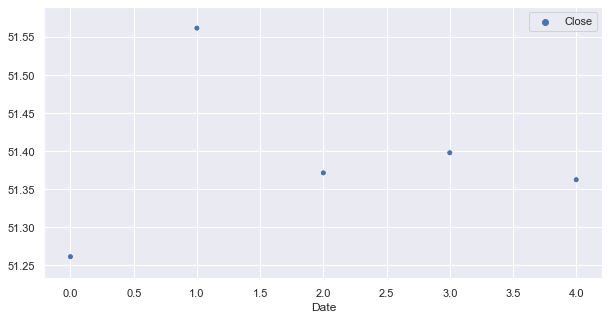

In [39]:
# daily average behavior
# 0, 1, 2, 3, 4 {Monday, Tuesday, Wednesday, Thursday, Friday}
rcParams['figure.figsize'] = 10, 5
a = new_data.groupby(new_data['Date'].dt.dayofweek).mean()
ax = sns.scatterplot(data=a)

plt.savefig('.\\images\\Close_Stock_Price_Adjusted_CumulativeDayofWeek_lv1.jpg')

As indicated initially, Saturdays {5} and Sundays {6} do not show results. In addition, the graph shows that apparently Tuesdays are the days on average where the stock of shares provides the greatest returns to investors, however the accumulated average only shows an improvement of 0.29%, which could be considered a very low marginal gain in this investment portfolio.

#### 2.3 Save data adjusted

In [43]:
# load data
df_adj.to_csv('.\\data\\eod.data-intc-adjusted.lv1.csv')